# PREDICTIVE MODELLING - GRADED PROJECT - CODED

In [1]:
# LET US START BY IMPORTING THE REQUIRED LIBRARIES
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
data=pd.read_csv('ottdata.csv')

## Displaying the first few rows of the dataset

In [3]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [4]:
data.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


In [5]:
data.shape

(1000, 8)

 * The dataset contains information (8 attributes) about 1000 show time

## Checking the data types of the columns for the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


* There are 5 numeric (float and int type) and 3 string (object type) columns in the data
* The target variable is the views content, which is of float type

## Statistical summary of the dataset

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89



* The distribution of visitors has a mean of 1.70429 and ranges from 1.25 to 2.34, indicating a relatively narrow spread around the mean.

* The ad impressions have a mean of 1434.71229 with a significant range from 1010.87 to 2424.2, indicating a wider spread and potential variability in impressions.

* This binary variable (presumably indicating whether a major sports event is happening or not) has a mean of 0.4, suggesting that about 40% of the observations involve a major sports event.

* There are 8 unique genres, with 'Others' being the most frequent genre, occurring 255 times in the dataset.

* There are 7 unique days of the week with 'Friday' being the most common, occurring 369 times, indicating a possible trend or preference for Fridays.

* There are 4 unique seasons with 'Winter' being the most frequent, occurring 257 times.

* The views for trailers have a mean of 66.91559, with values ranging from 30.08 to 199.92, indicating a wide range of viewership.

* The views for content have a mean of 0.4734, with values ranging from 0.22 to 0.89, suggesting a narrower range and possibly a more consistent viewership.



## Checking for duplicate values

In [8]:
data.duplicated().sum()

0

* There are no duplicate values in the data

## Checking for missing values

In [9]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

* There are no missing values in the data

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="purple"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="black", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )  # Add median to the histogram
     

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="twilight",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
     

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


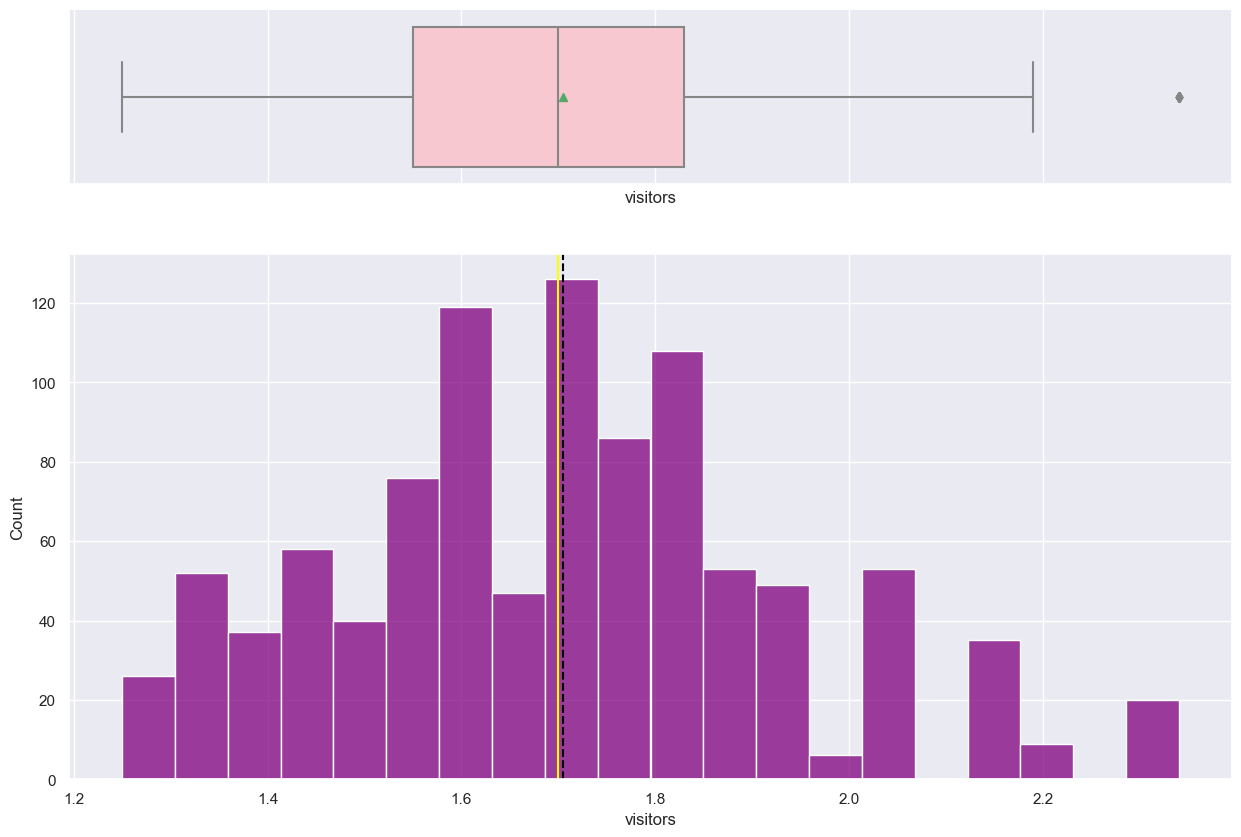

In [12]:
histogram_boxplot(data, "visitors")

* The distribution of visitors looks like slightly right skewed.
* Median is represented in yellow line.
* Mean is represented in black dotted lines.
* The histogram shows the frequency distribution of the visitors data. It seems to be slightly right-skewed, indicating that there are more data points clustered towards the lower values with a tail extending towards higher values.
* Peak: The highest bars in the histogram represent the mode, which is the most frequent range of visitor counts. Here, it seems that the most common visitor counts are around 1.7.
* Spread: The distribution of visitors ranges from approximately 1.2 to 2.2, with most values concentrated between 1.4 and 1.8.
* Mean and Median: The dashed vertical line in the histogram represents the mean, which appears to be close to the median in the box plot, indicating a relatively symmetric distribution.
* outliers are present.

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


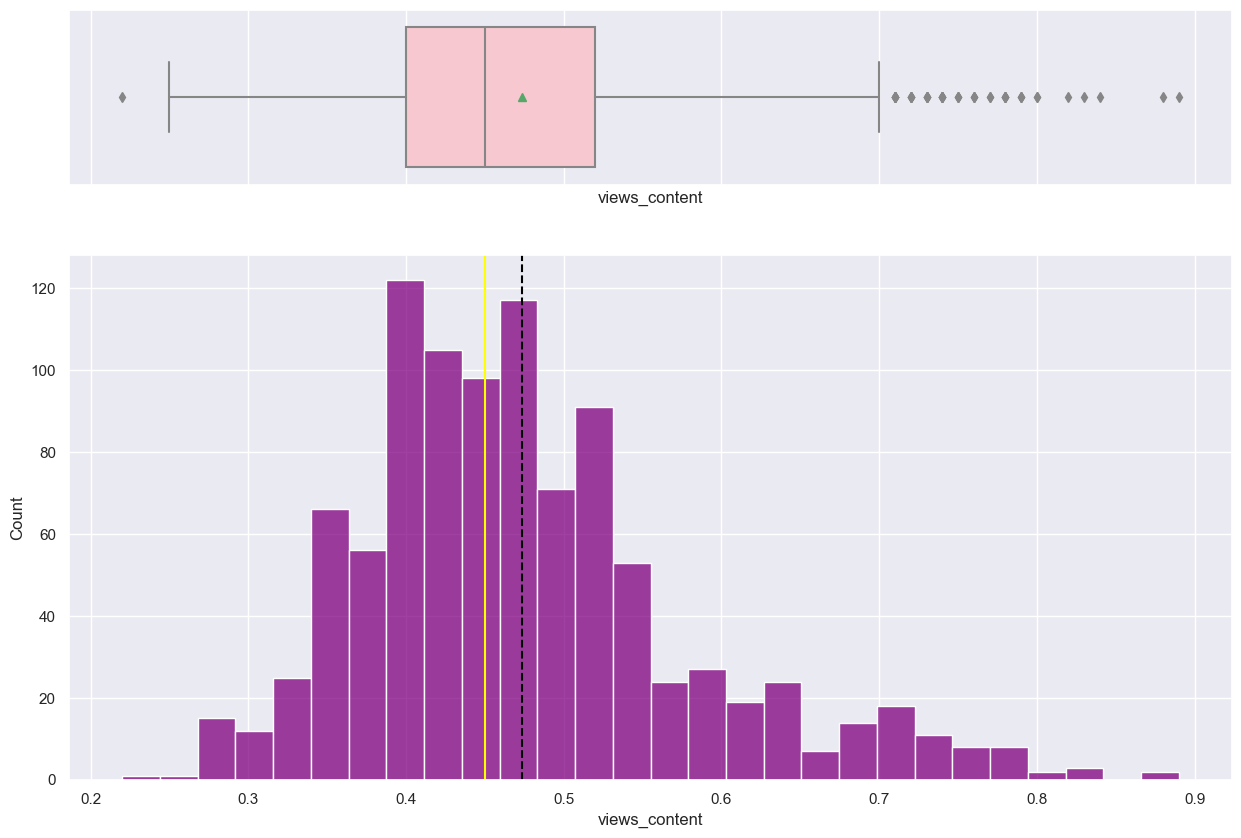

In [13]:
histogram_boxplot(data, "views_content")

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


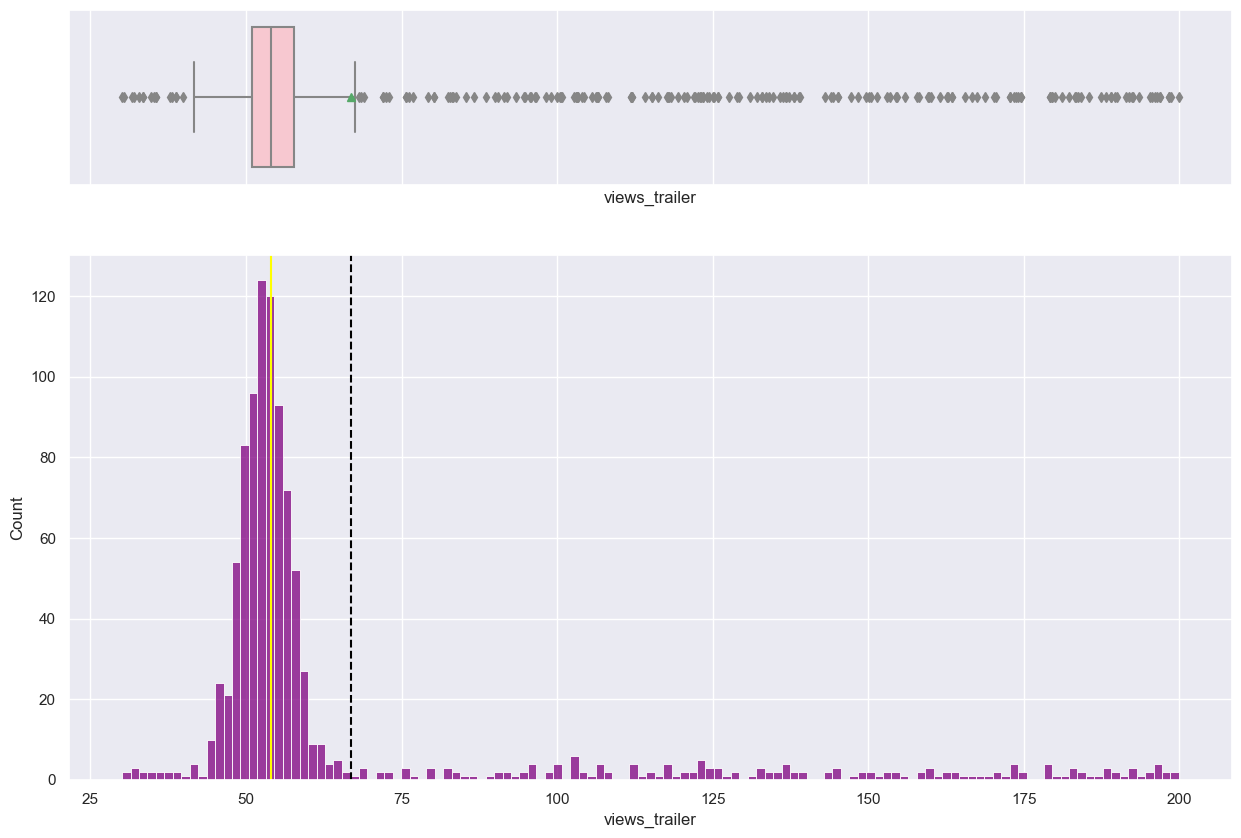

In [14]:
histogram_boxplot(data, "views_trailer")

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


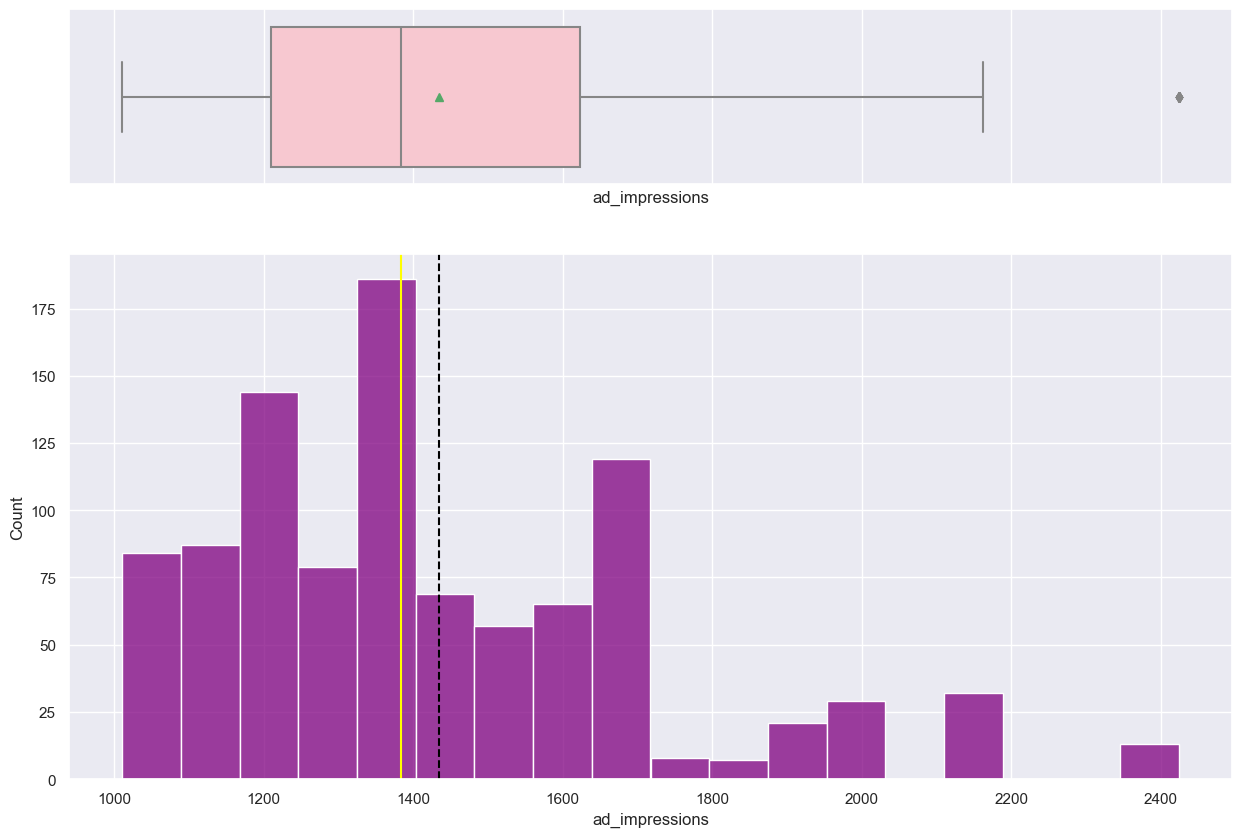

In [15]:
histogram_boxplot(data, "ad_impressions")

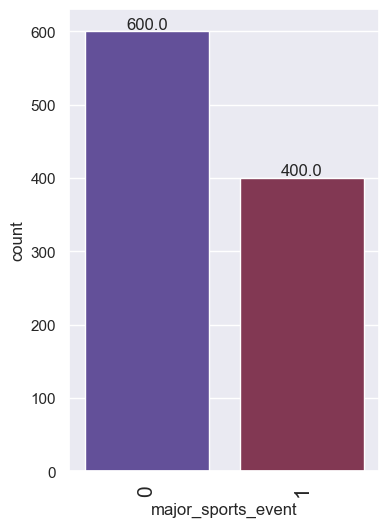

In [16]:
labeled_barplot(data, "major_sports_event")

* Only 400 people have watched major_sports_event
* 600 people are not interested in major_sports_event

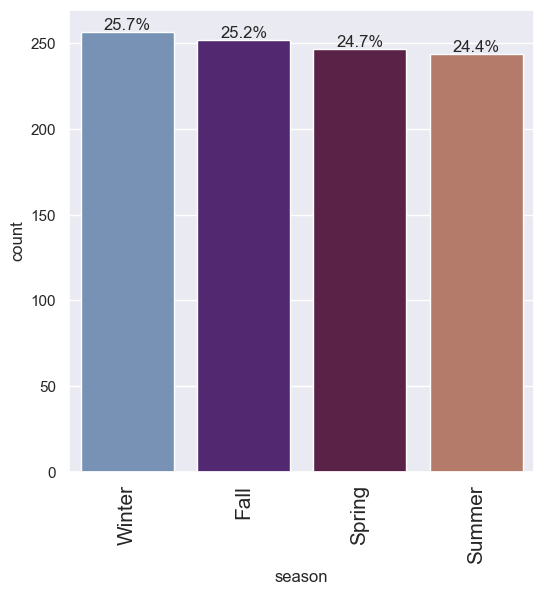

In [17]:
labeled_barplot(data, "season",perc= True)

There are four season almost all of them contains one fourth of the data.

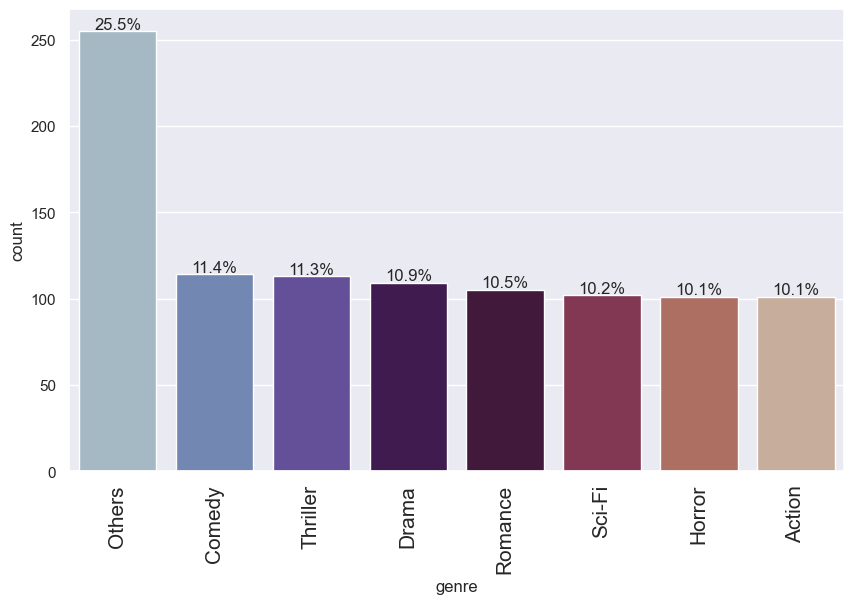

In [18]:
labeled_barplot(data, "genre",perc= True)

* Genre Others have the highest percentage 25.5.

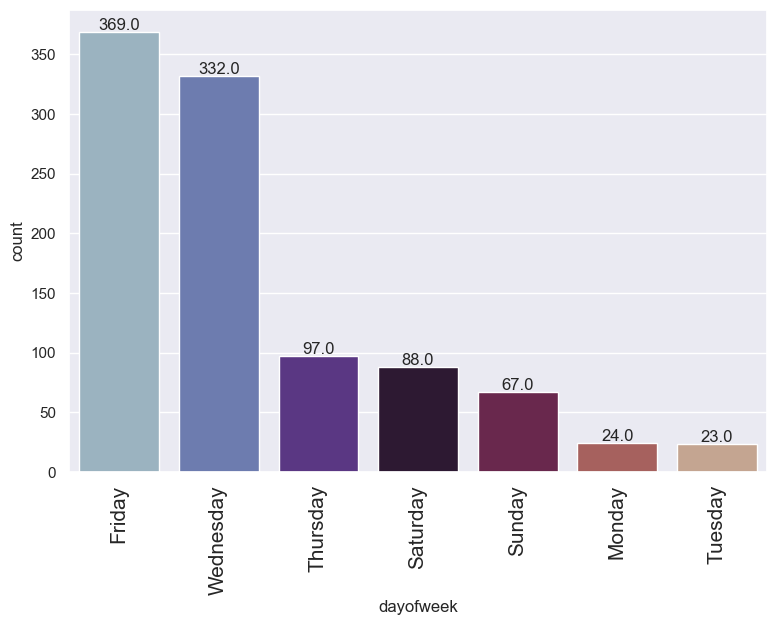

In [19]:

labeled_barplot(data, "dayofweek")

* Most of the content have released on Friday followed by Wednesday.
* Very few contents have released on Tuesday.

## Bivariate analysis

<Axes: xlabel='genre', ylabel='views_content'>

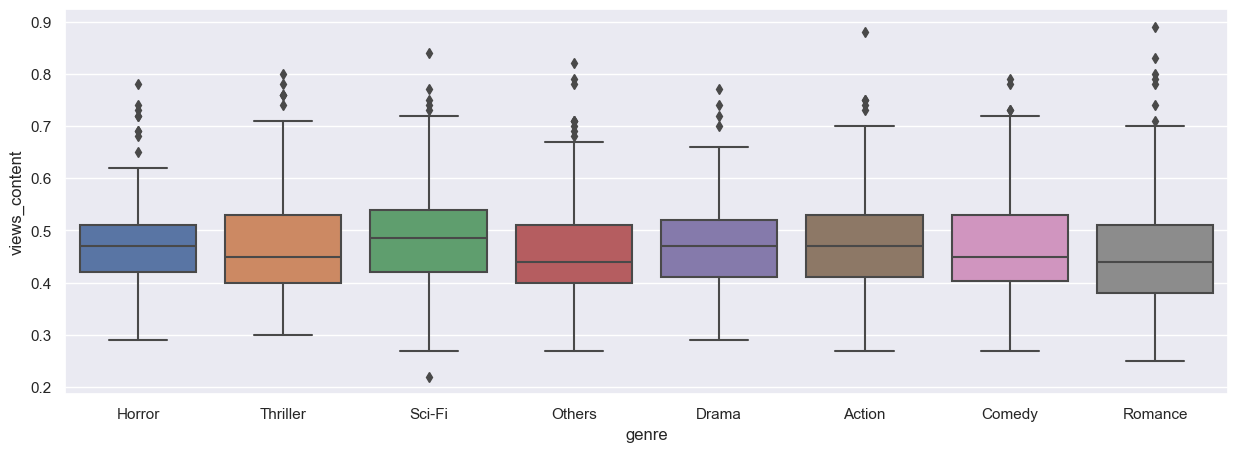

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="genre", y="views_content")

* Sci-Fi have higher variability in views, suggesting that while some content in these genres is very popular, there is also a significant amount of less-viewed content.
* Horror and Romance have multiple high outliers, indicating that certain content in these genres is particularly popular

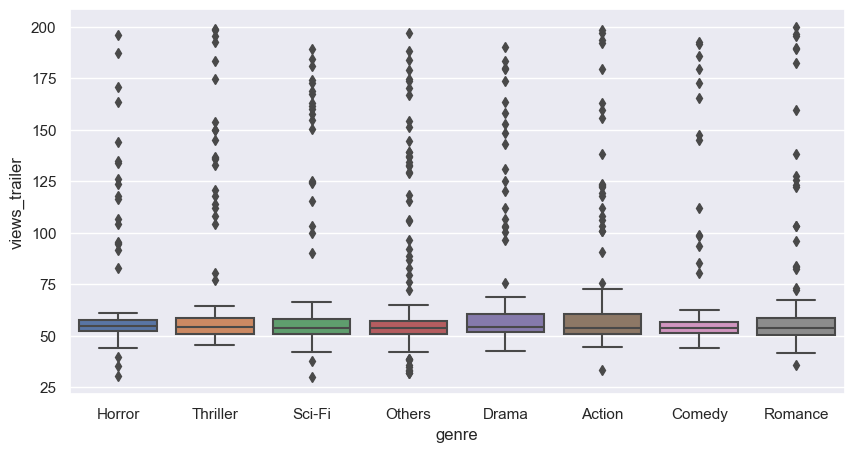

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="genre", y="views_trailer")
plt.show()

* Horror,Romance,Action,others and Thriller: These genres have the most high outliers, suggesting that trailers for these genres tend to attract more views.
* Drama and Comedy: Despite having high outliers, these genres have a slightly narrower range of typical trailer views, indicating more consistency.

<Axes: xlabel='genre', ylabel='ad_impressions'>

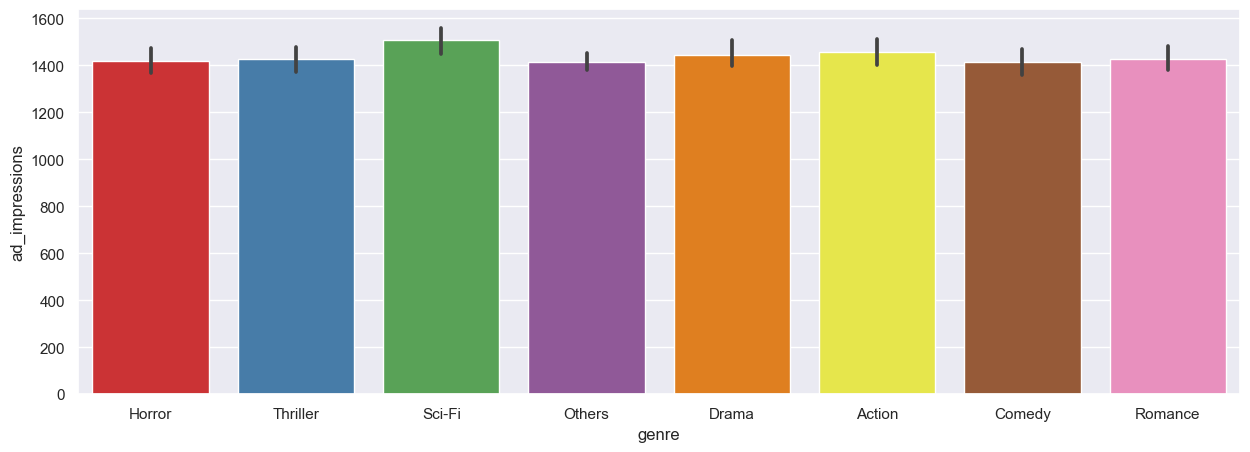

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, y="ad_impressions", x="genre", palette="Set1")

 * Ad-impression is little bit high for the Sci-Fi than other genre.

<Axes: xlabel='dayofweek', ylabel='views_content'>

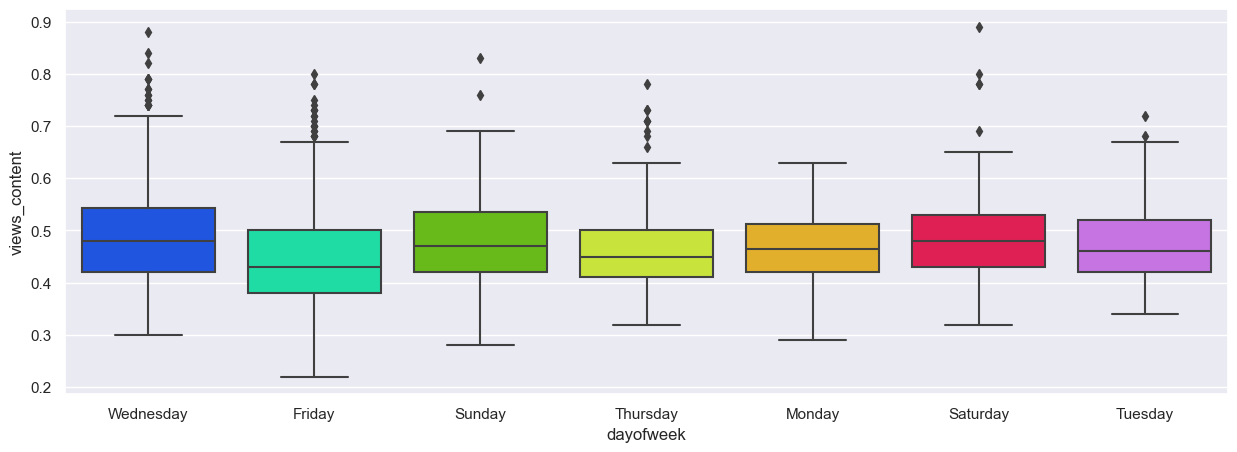

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="dayofweek", y="views_content", palette="gist_ncar")

* saturday and then wednesday have high viewership of content.
* less viewership of content on friday.

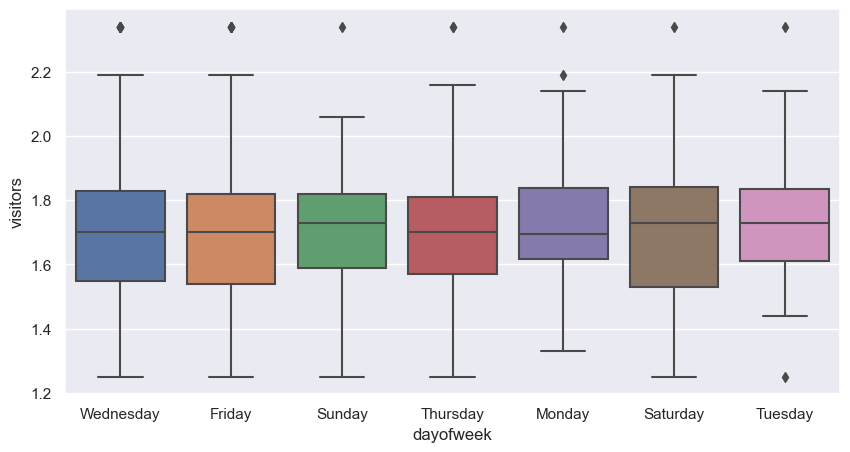

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="dayofweek", y="visitors")
plt.show()

* More visitors have seen content release on Saturday,Tuesday and sunday .
* Outliers are in all the day of the week.some content release has high response from visitors.

<Axes: xlabel='dayofweek', ylabel='views_trailer'>

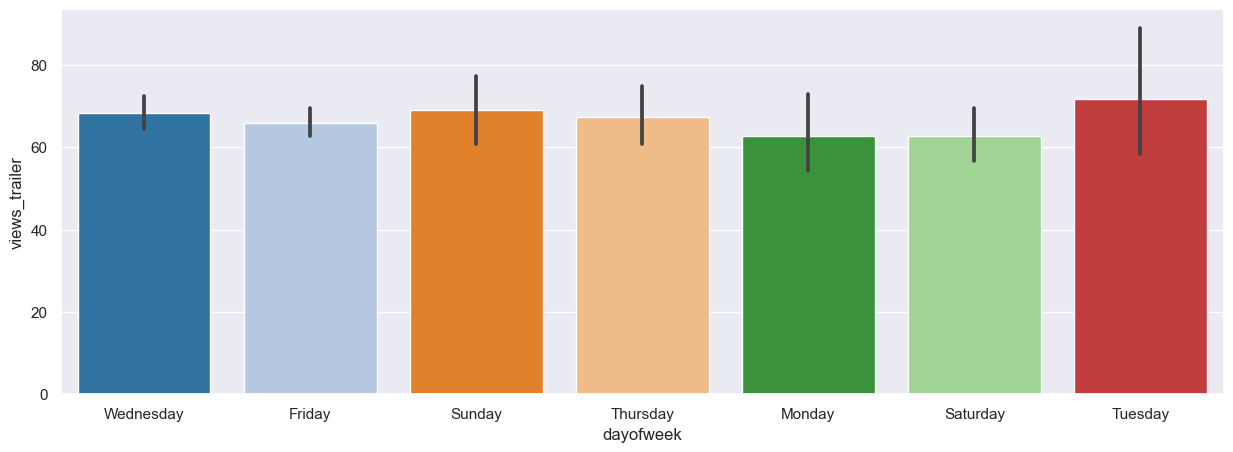

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="dayofweek", y="views_trailer", palette="tab20")
     

* Tuesday and sunday have the high views for trailer
* The mean trailer views is almost similar (53 to 55 millions) for all the day of the release of the content.
* In all the days of content release outliers can be observed.

<Axes: xlabel='season', ylabel='ad_impressions'>

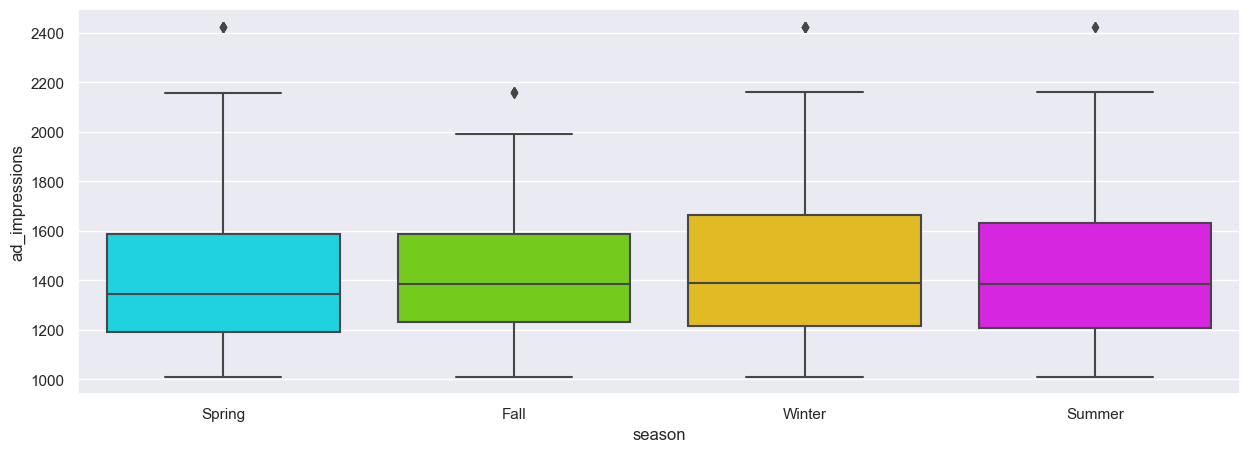

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="season", y="ad_impressions", palette="gist_ncar")

* Ad_impressions is high on winter season.

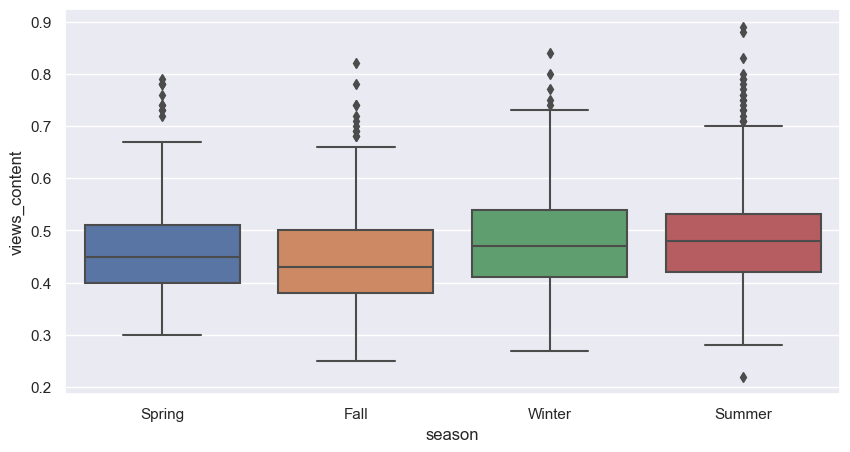

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="season", y="views_content")
plt.show()

* More viewership on content was found in summer.
* All season has outlier.some content in all the seasons was attracted by viewers.

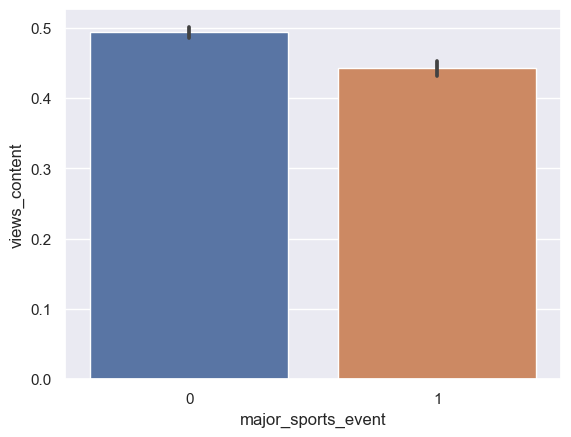

In [28]:
sns.barplot(data=data, x='major_sports_event',y='views_content');

* A significant decrease in average content viewership can be observed due to sports events, with 0.49 million views on non-sports event days compared to 0.44 million views on sports event days.

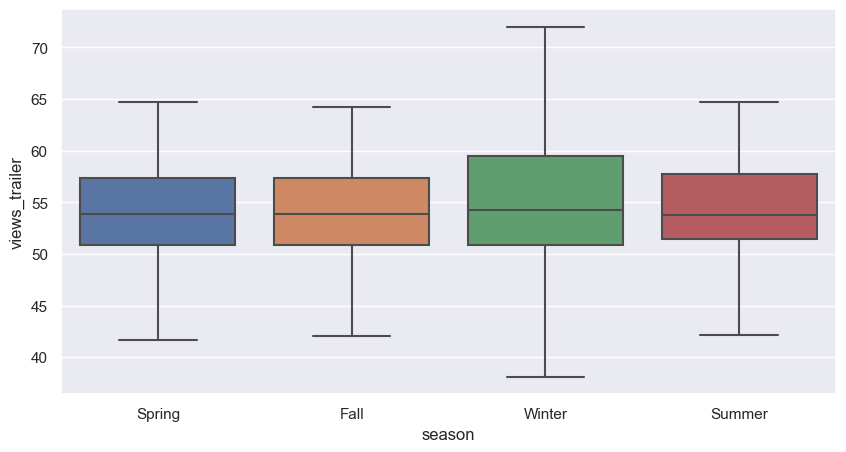

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="season", y="views_trailer", showfliers = False)
plt.show()

* The mean trailer views are almost at same number for all the season release of content.
* However, for winter the third quartile is higher than all the season realease.


### MULTIVARIATE ANALYSIS

<Axes: xlabel='genre', ylabel='views_content'>

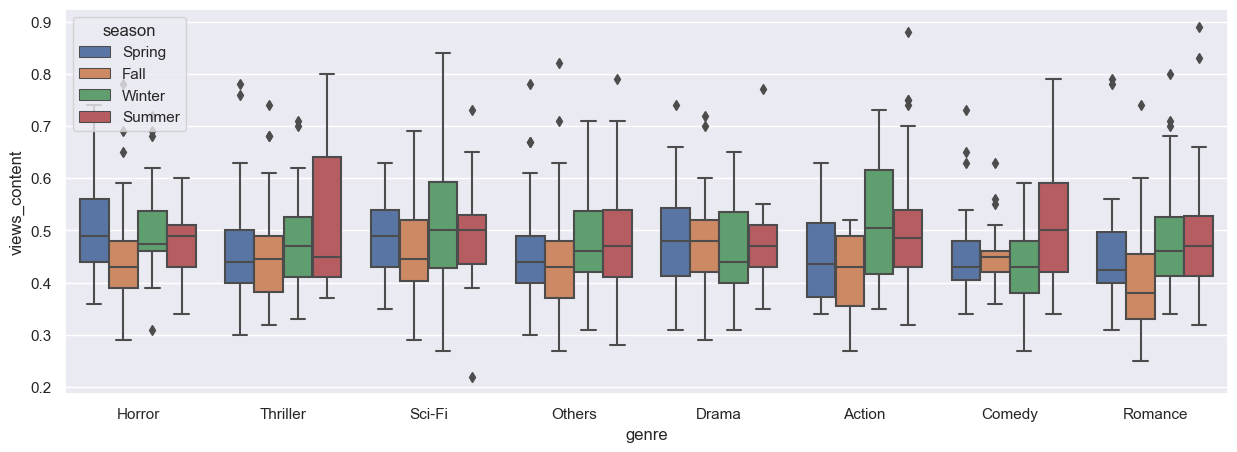

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="genre", y="views_content", hue="season")

<Axes: xlabel='genre', ylabel='visitors'>

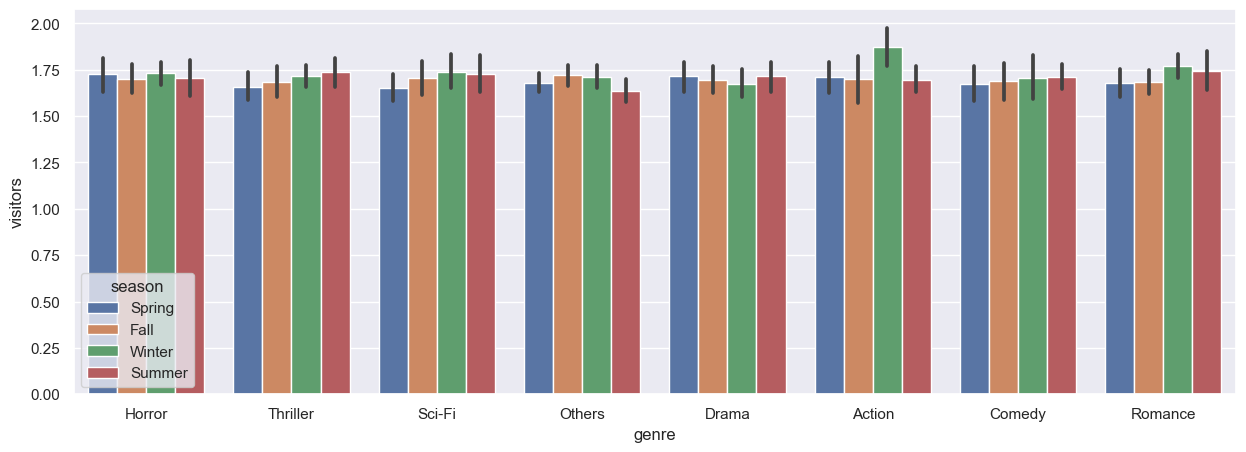

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="genre", y="visitors", hue="season")

* overall Action content has high views on winter season comparatively
* For Horror,winter season has high visitors.
* For Thriller content,summer has the high visitors.
* For Sci-Fi,winter season has high views.
* For others.fall season has high visitors.
* For Drama,summer season has high visitors.
* Romance has high views on winter and summer season.

Let's check how trailer views can contribute to the content views.

<Figure size 3000x1000 with 0 Axes>

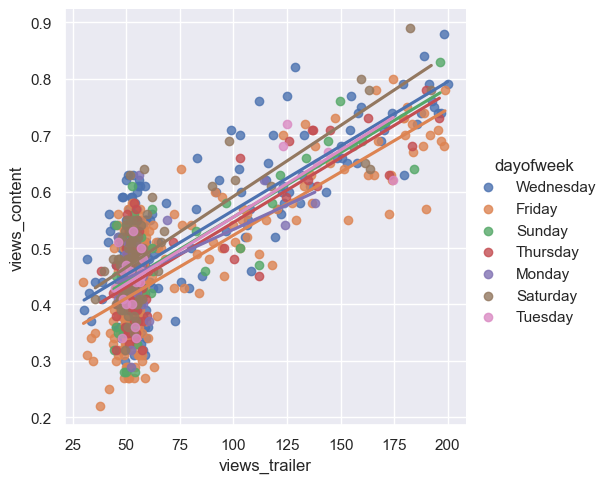

In [32]:
plt.figure(figsize = (30,10))
sns.lmplot(data=data, x='views_trailer',y='views_content',hue='dayofweek',ci=True);

* Content viewership is positively correlated with trailer viewership. 
* On Saturdays, there is a higher number of content viewers compared to other weekdays.
*  Interestingly, Sundays show relatively low viewers, which could be further analyzed by examining the data for different hours of the day.

<Axes: xlabel='season', ylabel='ad_impressions'>

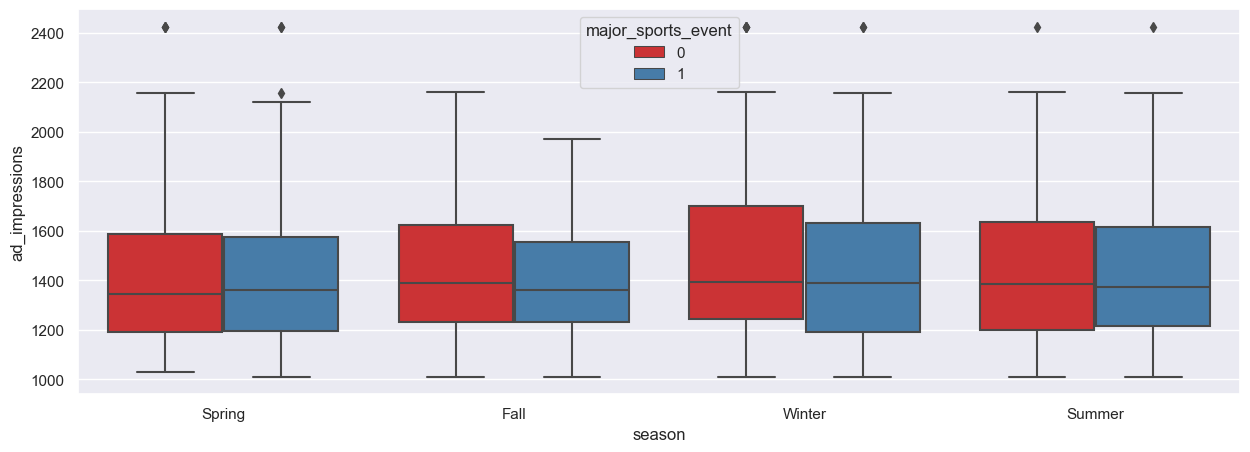

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="season", y="ad_impressions", hue="major_sports_event", palette="Set1")

* Ad-impression has less views on all the season during major-sport-event except in spring season.

<Axes: xlabel='genre', ylabel='views_content'>

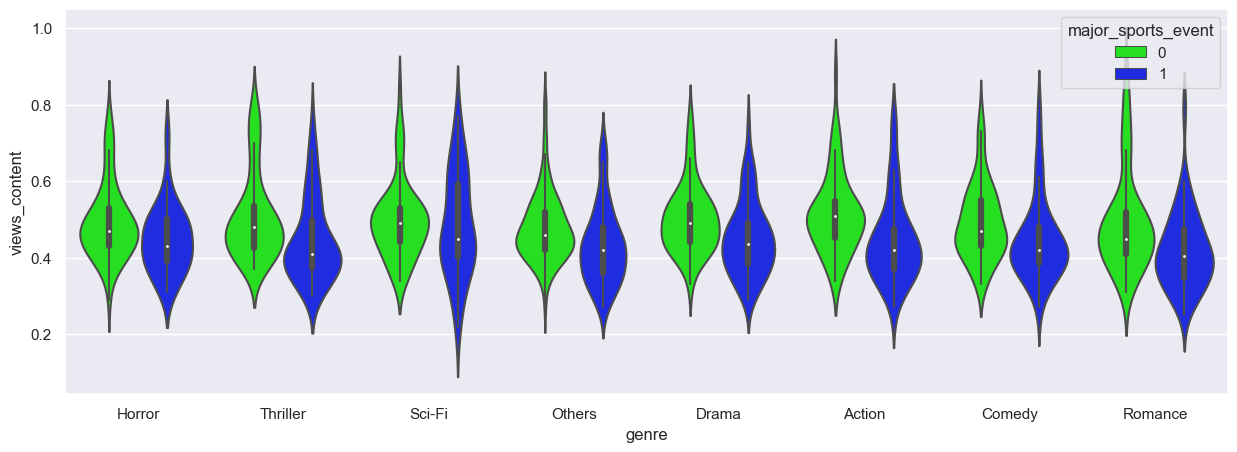

In [34]:
plt.figure(figsize=(15,5))
sns.violinplot(data=data, x="genre", y="views_content", hue="major_sports_event", palette="hsv")

*All the genre has less viewership on content during the major-sports event.

<Axes: xlabel='season', ylabel='visitors'>

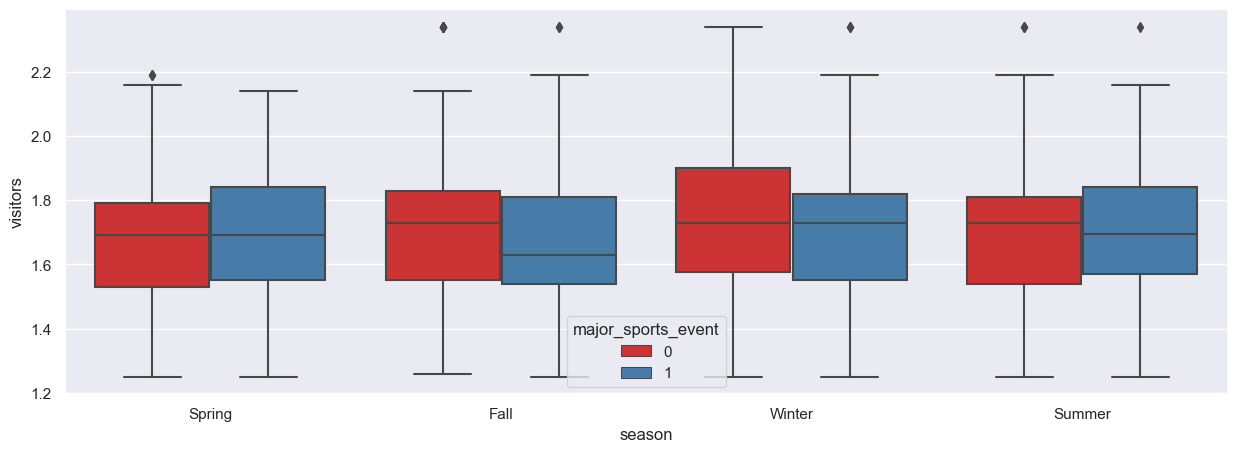

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="season", y="visitors", hue="major_sports_event", palette="Set1")

* Fall and summer season have less visitors during major sports event.
* For other seasons,there is no much variation due to major sports event.

<Axes: xlabel='genre', ylabel='visitors'>

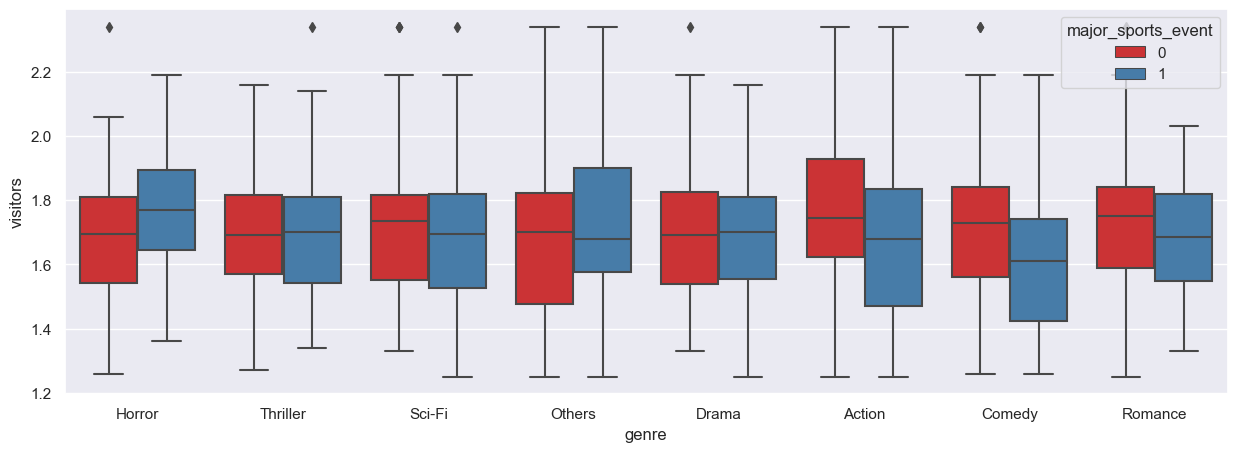

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x="genre", y="visitors", hue="major_sports_event", palette="Set1")

* Horror content has high visitors irrespective of major sports event.
* Other genre have less visitors during major sports event.

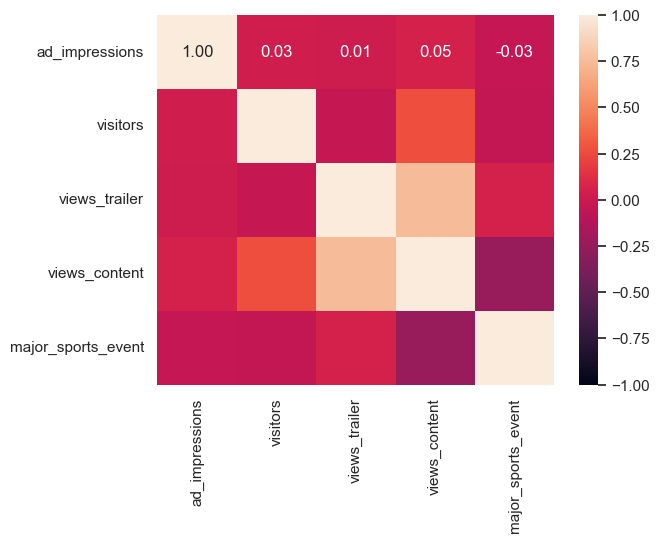

In [37]:

sns.heatmap(data=data[['ad_impressions','visitors','views_trailer','views_content','major_sports_event']].corr(), annot=True, fmt='.2f',cbar=True,vmin=-1,vmax=+1);

* High Positive correlation can be observed between Views content and views trailer.
* A negative correlation can be observed between major sprots event and content views.
* A negative correlation can be observed between major sprots event and views-trailer.
* A negative correlation can be observed between major sprots event and ad-impression.


C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

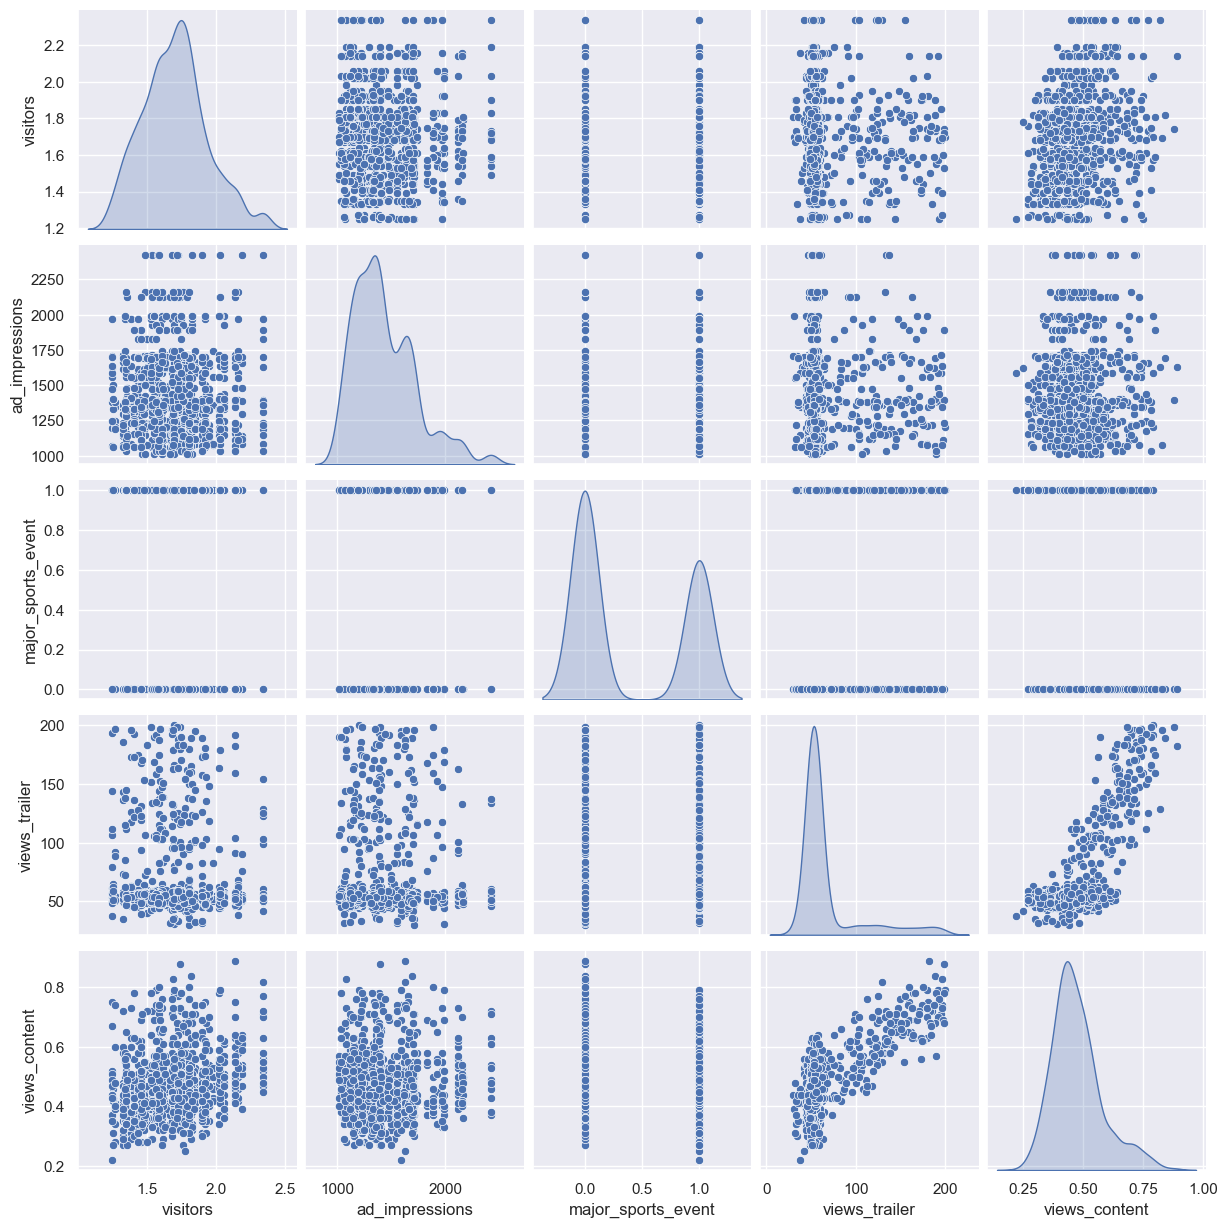

In [38]:
sns.pairplot(
    data, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag
























Question 1: What does the distribution of content views look like?

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

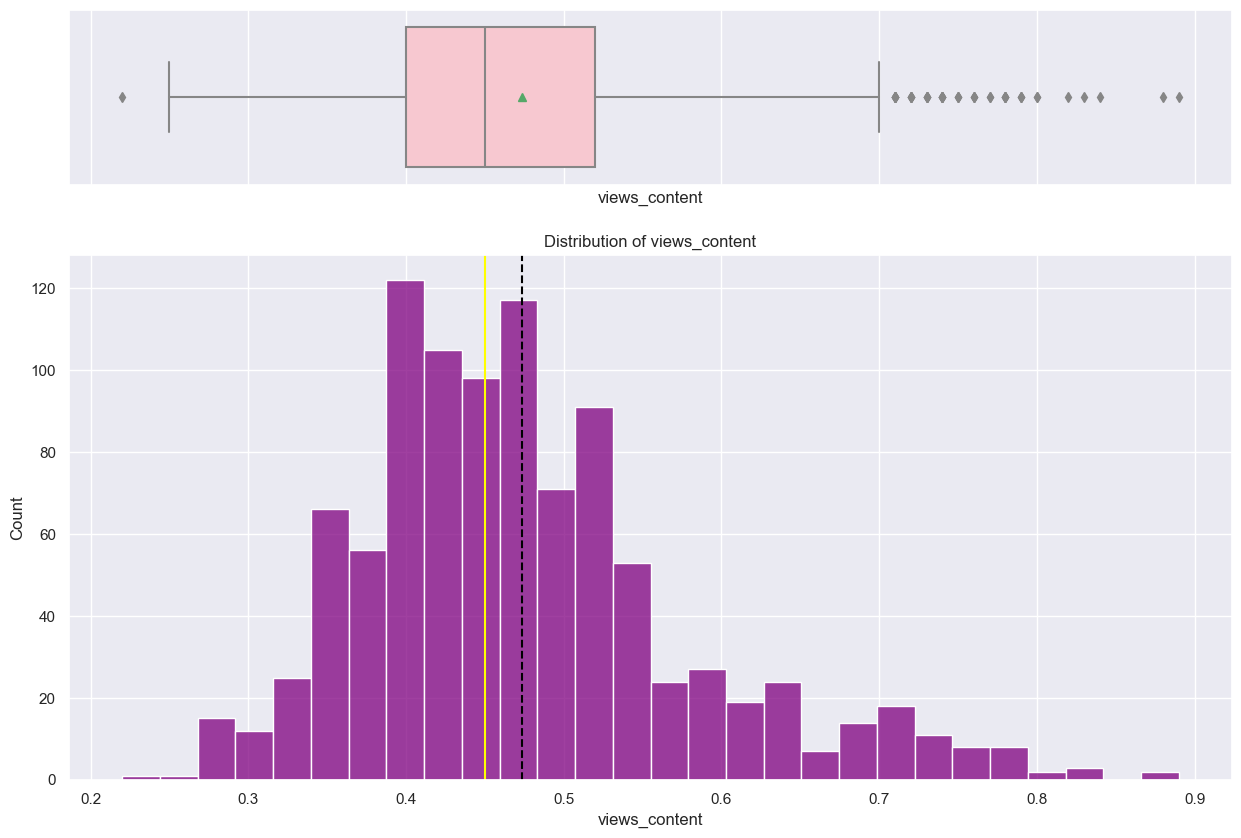

In [39]:
histogram_boxplot(data, "views_content")
plt.title('Distribution of views_content')
plt.xlabel('views_content')
plt.ylabel('Count')

### Avg less than 0.5 million watched the actual content.

Question 2. What does the distribution of genres look like?

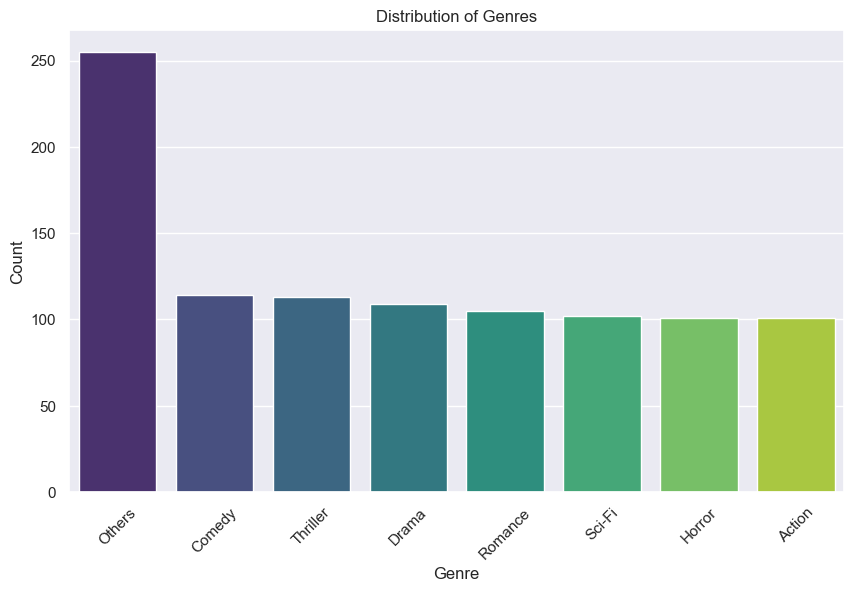

In [40]:
genre_counts = data['genre'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* From this plot we can say,Genre others have the highest distribution.
* Genre others is almost one fourth of total genre.

Question 3: The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?

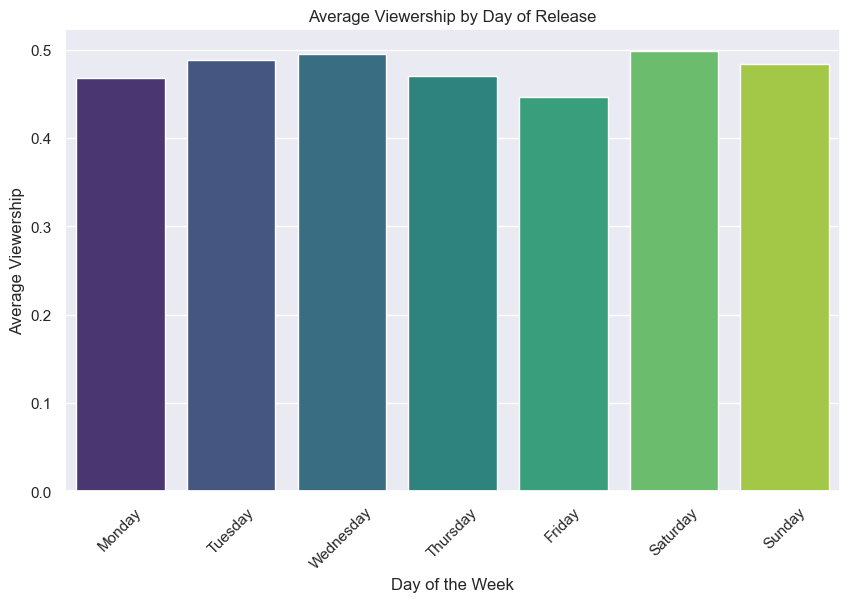

In [41]:
# Calculate the average views_content for each day of the week
viewership_by_day = data.groupby('dayofweek')['views_content'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the viewership variation with the day of release
plt.figure(figsize=(10, 6))
sns.barplot(x=viewership_by_day.index, y=viewership_by_day.values, palette='viridis')
plt.title('Average Viewership by Day of Release')
plt.xlabel('Day of the Week')
plt.ylabel('Average Viewership')
plt.xticks(rotation=45)
plt.show()

* The mean content views decreases for Friday content release with respect to other days.
* Saturday has the highest average viewership nearly 0.5.
* Wednesday is the second highest.


Question 4:How does the viewership vary with the season of release?

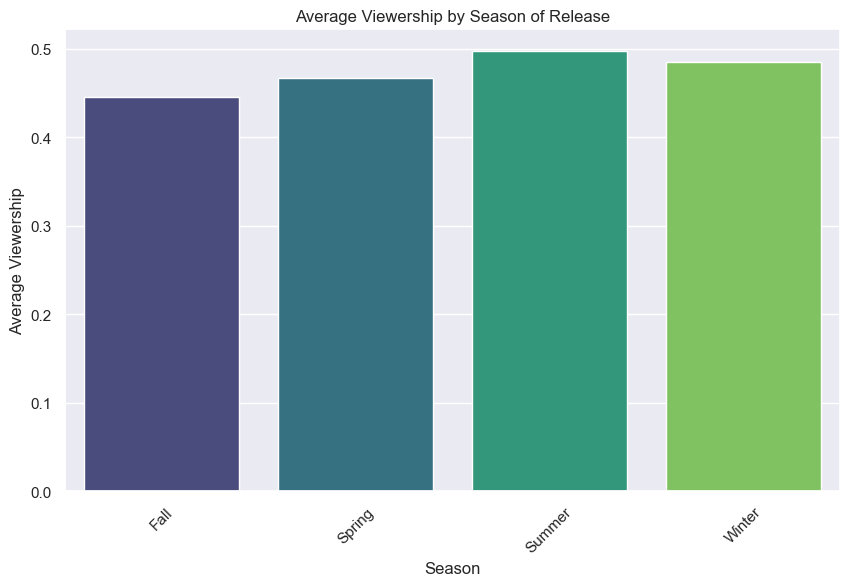

In [42]:
# Calculate the average views_content for each season
viewership_by_season = data.groupby('season')['views_content'].mean()

# Plot the viewership variation with the season of release
plt.figure(figsize=(10, 6))
sns.barplot(x=viewership_by_season.index, y=viewership_by_season.values, palette='viridis')
plt.title('Average Viewership by Season of Release')
plt.xlabel('Season')
plt.ylabel('Average Viewership')
plt.xticks(rotation=45)
plt.show()

* From this plot we can say,summer has the highest average viewership nearly 0.5, while Fall has the lowest which is 0.45 average viewership.
* In the winter and summer the mean content views increases than the fall and spring season.
* Average content views for all the seasons looks in between 0.43 to 0.5 millions.

Question 5: What is the correlation between trailer views and content views?

Pearson correlation coefficient between trailer views and content views: 0.7539622148205363


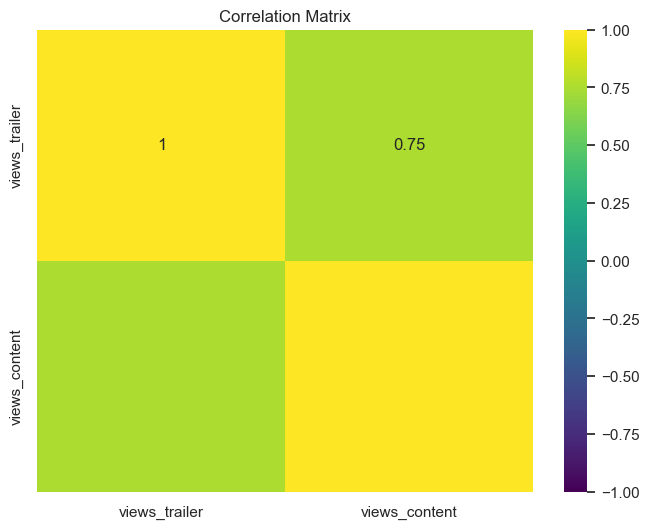

In [43]:
# Calculate the Pearson correlation coefficient
correlation = data['views_trailer'].corr(data['views_content'])
print(f"Pearson correlation coefficient between trailer views and content views: {correlation}")
# Visualize the correlation matrix using a heatmap
correlation_matrix = data[['views_trailer', 'views_content']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

* Trailer views and content views have a positive correlation.
* Correlation coefficient between trailer views and content views: 0.75

## Data preprocessing

### Checking for duplicate values

In [44]:
data.duplicated().sum()

0

* There are no duplicated values in the data

### Checking for missing values

In [45]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

* There are no missing values in the data

### Outlier Treatment

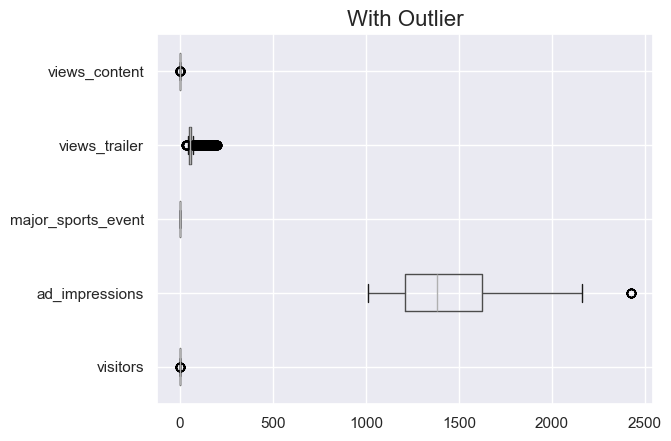

In [46]:
cont=data.dtypes[(data.dtypes!='object')].index
data[cont].boxplot(vert=0)
plt.title('With Outlier',fontsize=16)
plt.show()

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+ (1.5*IQR)
    return lower_range,upper_range

In [48]:
for column in data[cont].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

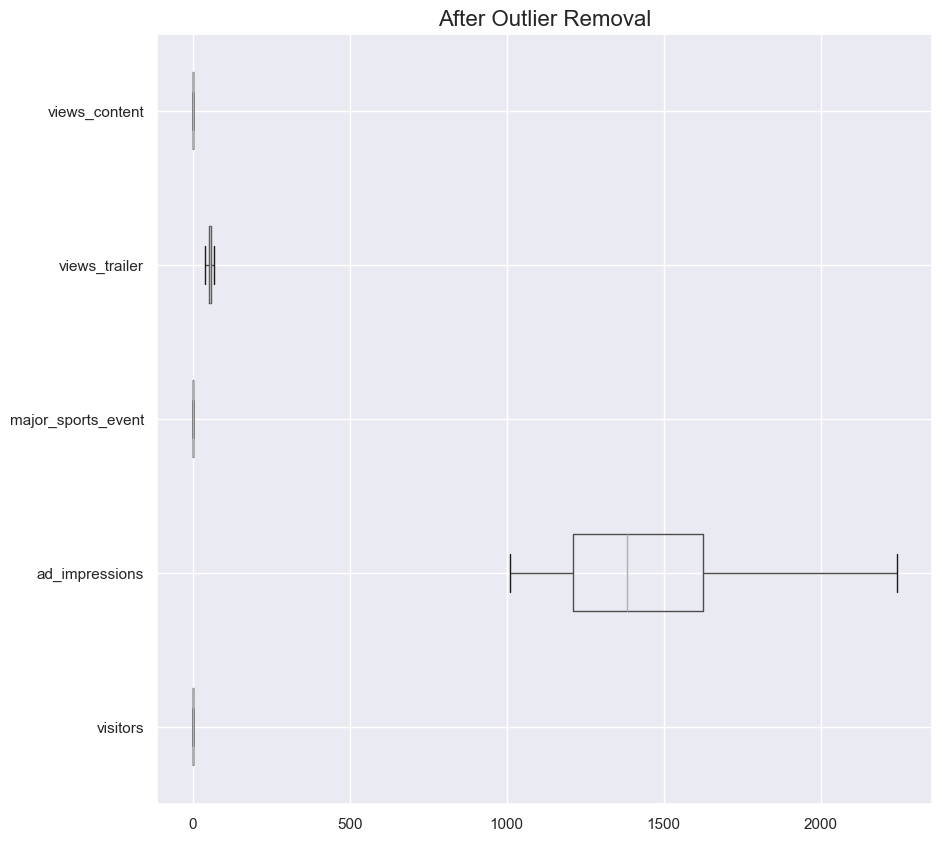

In [49]:
plt.figure(figsize=(10,10))
data[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Feature Engineering

#### For the column major_sports_event, replace the 1 values with 'yes' and 0 values with 'no'.



In [50]:
data["major_sports_event"] = data["major_sports_event"].replace({1: "yes", 0: "no"})
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,no,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,yes,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,yes,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,yes,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,no,Sci-Fi,Sunday,Winter,55.83,0.46


## Create Dummy Variables

In [51]:
# drop_first=True will drop one of the extra columns
data = pd.get_dummies(data, columns=data.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
data.head()

,visitors,ad_impressions,views_trailer,views_content,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.51,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,52.69,0.32,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,48.74,0.39,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,49.81,0.44,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,55.83,0.46,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


## Split Data

In [52]:
# defining X and y variables
X = data.drop(["views_content"], axis=1)
y = data["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  views_trailer  major_sports_event_yes  \
0      1.67         1113.81          56.70                   False   
1      1.46         1498.41          52.69                    True   
2      1.47         1079.19          48.74                    True   
3      1.85         1342.77          49.81                    True   
4      1.46         1498.41          55.83                   False   

   genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  \
0         False        False          True         False          False   
1         False        False         False         False          False   
2         False        False         False         False          False   
3         False        False         False         False          False   
4         False        False         False         False          False   

   genre_Sci-Fi  genre_Thriller  dayofweek_Monday  dayofweek_Saturday  \
0         False           False             False      

In [53]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,52.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,48.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,49.81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,55.83,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
# let's add the intercept to data
X = sm.add_constant(X)

In [55]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


## Model Building - Linear Regression

In [56]:
x_train

,const,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,49.62000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
716,1.0,1.69,2158.03,67.96625,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
640,1.0,1.47,1229.35,54.13000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,1.0,1.49,1010.87,67.96625,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,1.0,2.19,1119.90,52.04000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,1323.74,55.61000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
72,1.0,1.77,1700.04,54.98000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
908,1.0,1.54,1398.05,53.75000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,2.02,1284.86,67.96625,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     60.73
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.15e-136
Time:                        16:41:32   Log-Likelihood:                 986.21
No. Observations:                 700   AIC:                            -1930.
Df Residuals:                     679   BIC:                            -1835.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## Interpretation of Regression results

1. Adjusted. R-squared: It reflects the fit of the model.

* Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
* In our case, the value for adj. R-squared is 0.641, which is good.

2. Const coefficient: It is the Y-intercept.

* It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
* In our case, the value for const coefficient is -0.2730

3. Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
* In our case, the coefficient of Visitors is 0.1161.

### Interpretation of Coefficients
* The coefficients tell us how one unit change in X can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.

* In this data set, for example, presence of sports event on same day occurs with a 0.0619 decrease in viewership, and increase in visitors by single person occurse with a 0.1161 increase in the content viewership.

* Earlier in the heat map, we observed that the relationship between major sports events and content viewership is negatively correlated (as sports events increase, content viewership decreases, and vice versa), while the relationship between the number of visitors and content viewership is positively correlated (as the number of visitors increases, content viewership also increases, and vice versa). Consequently, the signs of the coefficients align with these relationships, suggesting a low probability of multicollinearity in our data.

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

### Interpretation of p-values (P > |t|)
For each predictor variable there is a null hypothesis and alternate hypothesis.

Null hypothesis : Predictor variable is not significant
Alternate hypothesis : Predictor variable is significant
(P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

However, due to the presence of multicollinearity in our data, the p-values will also change.

We need to ensure that there is no multicollinearity in order to interpret the p-values.

## How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient Bk
 is "inflated" by the existence of correlation among the predictor variables in the model.

#### General Rule of Thumb:

* If VIF is 1, then there is no correlation among the kth predictor and the remaining predictor variables, and hence, the variance of 
Bk is not inflated at all.
* If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
* The purpose of the analysis should dictate which threshold to use.

#### Model Performance Check
*Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and R -Squared
* We will define a function to calculate MAPE and adjusted R -Squared
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
* We will create a function which will print out all the above metrics in one go.

In [58]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [59]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.059142,0.046708,0.64141,0.630303,10.199322


In [60]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.065309,0.052897,0.561854,0.528757,11.506957


## Observations

* The training R- squared is 0.64, so the model is not underfitting

* The train and test RMSE and MAE are comparable, so the model is not overfitting either

* MAE suggests that the model can predict view_contents within a mean error of 0.05 on the test data

* MAPE of 11.50 on the test data means that we are able to predict within 11.50% of the viewership of content.

## Checking Linear Regression Assumptions
We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

## TEST FOR MULTICOLLINEARITY
* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk
 is "inflated" by the existence of correlation among the predictor variables in the model.

* If VIF is 1, then there is no correlation among the k
th predictor and the remaining predictor variables, and hence, the variance of βk
 is not inflated at all.
 
* General Rule of thumb:

* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.
* If VIF is exceeding 10, it shows signs of high multicollinearity.

#### Let's define a function to check VIF.

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [62]:
checking_vif(x_train)


,feature,VIF
0,const,166.186883
1,visitors,1.026119
2,ad_impressions,1.029638
3,views_trailer,1.028166
4,major_sports_event_yes,1.070634
5,genre_Comedy,1.913797
6,genre_Drama,1.921646
7,genre_Horror,1.902867
8,genre_Others,2.567207
9,genre_Romance,1.753305


* We can see the VIF for genre_Others is more than 2.

In [63]:
# drop the genre_Others and check if the r-sq shows significant variation
x_train2 = x_train.drop(["genre_Others"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.641 
Adjusted R-squared: 0.631


In [64]:
x_train = x_train.drop(["genre_Others"], axis=1)

In [65]:
olsmod_2 = sm.OLS(y_train, x_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     63.98
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.02e-137
Time:                        16:41:33   Log-Likelihood:                 986.07
No. Observations:                 700   AIC:                            -1932.
Df Residuals:                     680   BIC:                            -1841.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

* On dropping 'genre_Others',There is no major changes in adj. R-squared and R-Squared.
* This shows Low Impact on Model Performance.


### Let's check if multicollinearity is still present in the data.

In [66]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                     153.669019
visitors                    1.020698
ad_impressions              1.028897
views_trailer               1.027870
major_sports_event_yes      1.070178
genre_Comedy                1.204448
genre_Drama                 1.223159
genre_Horror                1.205554
genre_Romance               1.171698
genre_Sci-Fi                1.205336
genre_Thriller              1.206277
dayofweek_Monday            1.063674
dayofweek_Saturday          1.155123
dayofweek_Sunday            1.150353
dayofweek_Thursday          1.169773
dayofweek_Tuesday           1.056174
dayofweek_Wednesday         1.317860
season_Spring               1.540998
season_Summer               1.542795
season_Winter               1.568307
dtype: float64



* All the variables has VIF less than 2.
* We have dealt with multicollinearity in the data
### Let's rebuild the model using the updated set of predictors variables
### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables all togather having p value > 0.05

In [67]:
olsmod_2 = sm.OLS(y_train, x_train).fit()
print(olsmod_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     63.98
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.02e-137
Time:                        16:41:33   Log-Likelihood:                 986.07
No. Observations:                 700   AIC:                            -1932.
Df Residuals:                     680   BIC:                            -1841.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Interpreting the Regression Results:

4. std err: It reflects the level of accuracy of the coefficients.

* The lower it is, the higher is the level of accuracy.
5. P>|t|: It is p-value.

* For each independent feature, there is a null hypothesis and an alternate hypothesis. Here Bi is the coefficient of the ith independent variable.

 H0: Independent feature is not significant ( Bi = 0)
 Ha : Independent feature is that it is significant (Bi != 0)

* (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.

* A p-value of less than 0.05 is considered to be statistically significant.
6. Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

### Observations

* We can see that there is no major change in adj. R-squared , which shows that the dropped columns did not have much effect on the model
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables
* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
* Instead, we will do the following:
* Build a model, check the p-values of the variables, and drop the column with the highest p-value
* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
* Repeat the above two steps till there are no columns with p-value > 0.05

##### Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [68]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'major_sports_event_yes', 'genre_Sci-Fi', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [69]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [70]:
olsmod_3 = sm.OLS(y_train, x_train2).fit()
print(olsmod_3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          5.85e-143
Time:                        16:41:33   Log-Likelihood:                 983.60
No. Observations:                 700   AIC:                            -1941.
Df Residuals:                     687   BIC:                            -1882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [71]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod_3, x_train2, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.059363,0.046772,0.638723,0.631877,10.214645


In [74]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod_3, x_test2, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.065566,0.053145,0.558408,0.538336,11.586675


### Observations

* Now no feature has p-value greater than 0.05, so we'll consider the features in x_train2 as the final set of predictor variables and olsmod3 as the final model to move forward with
* Now adjusted R-squared is 0.632, i.e., our model is able to explain ~63% of the variance
* The adjusted R-squared in olsmod2 (where we considered the variables without multicollinearity) was 0.631
* This shows that the variables we dropped were not much affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

Now we'll check the rest of the assumptions on olsmod3.

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### Assumptions of Linear Regression
* These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

* For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [75]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmod_3.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmod_3.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.40,0.428238,-0.028238
1,0.70,0.629866,0.070134
2,0.42,0.450182,-0.030182
3,0.55,0.576973,-0.026973
4,0.59,0.556401,0.033599


### TEST FOR LINEARITY AND INDEPENDENCE
#### Why the test?

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
#### How to check linearity?

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.
#### How to fix if this assumption is not followed?

* We can try different transformations.

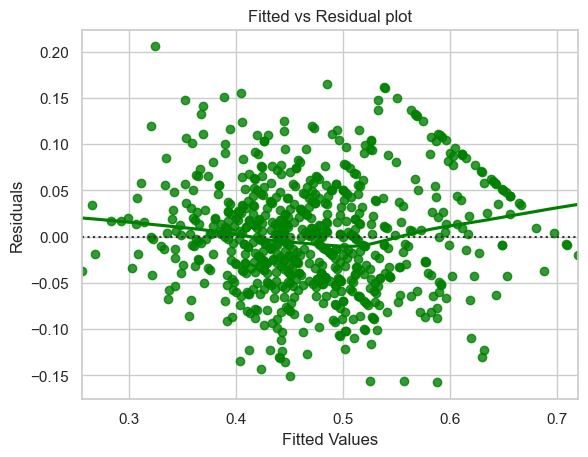

In [76]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="green", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

What is the test?

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

What does non-normality indicate?

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

How to check the Normality?

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

##### Another test to check for normality is the Shapiro-Wilk test.
* Null hypothesis: Residuals are normally distributed
* Alternate hypothesis: Residuals are not normally distributed

How to Make residuals normal?

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

C:\Users\Benita Merlin E\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


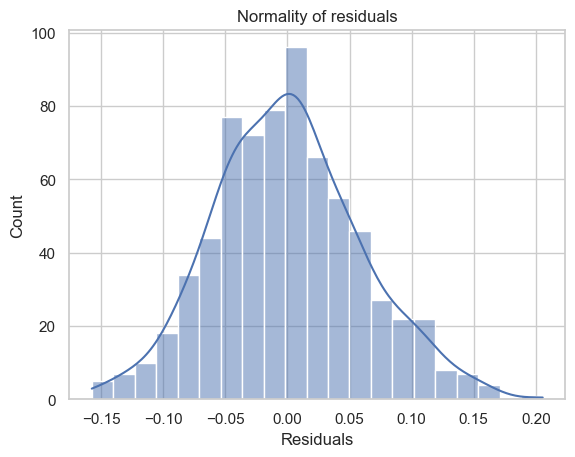

In [77]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

* The residual terms are normally distributed

### The Q-Q plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

### Let's check Q-Q Plot

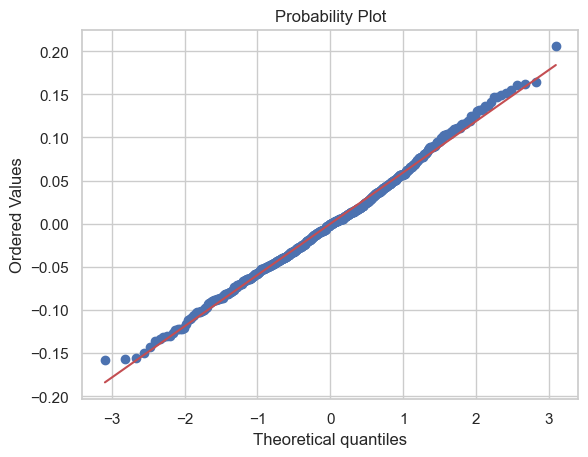

In [78]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot except at the tails.

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Residual is normally distributed.
* Alternate hypothesis - Residuals is not normally distributed.

In [88]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9955450296401978, pvalue=0.04188501089811325)

Since p-value < 0.05, the residuals are not normally distributed as per shapiro test.

* While the test statistic is close to 1, indicating that the data is near normal, the p-value suggests that deviations from normality are statistically significant. This means we need to consider alternative methods or transformations if normality is a crucial assumption for the analysis or modeling.

### TEST FOR HOMOSCEDASTICITY
* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Why the test?

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
How to check if model has Heteroscedasticity?

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.
How to deal with Heteroscedasticity?

* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [80]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [82]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.1616405144400677), ('p-value', 0.08477906249012608)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

### Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [83]:
# predictions on the test set
pred = olsmod_3.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.479335
194,0.51,0.615628
314,0.48,0.461251
429,0.41,0.496161
267,0.41,0.473426
746,0.68,0.520500
186,0.62,0.588667
964,0.48,0.496081
676,0.42,0.491408
320,0.58,0.605350


* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

### Final Model

#### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model 

In [84]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [85]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          5.85e-143
Time:                        17:18:34   Log-Likelihood:                 983.60
No. Observations:                 700   AIC:                            -1941.
Df Residuals:                     687   BIC:                            -1882.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [86]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.059363,0.046772,0.638723,0.631877,10.214645


In [87]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.065566,0.053145,0.558408,0.538336,11.586675


* The model is able to explain ~63% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 11.58% of the viewership of content.

* Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

### Actionable Insights and Recommendations
* The model's R-squared value is approximately 0.639, and the adjusted R-squared is 0.632, indicating that the model can explain about 63% of the variance in the data. This is quite satisfactory.

* This suggests that the model is suitable for both prediction and inference purposes.

* Major Sports Event: Negative coefficient (-0.0622) with a high t-value (-13.150) and a p-value of 0.000, indicating that the presence of major sports events negatively impacts first-day viewership.
* A major sports event will lead to a 0.0604 unit decrease in content viewership, assuming all other variables remain constant.
* To improve content viewership, it is recommended to avoid releasing content on days when major sports events are happening.

* Visitors: Positive coefficient (0.1169) with a very high t-value (11.978) and a p-value of 0.000, indicating a strong positive relationship with first-day viewership. More visitors to the platform lead to higher first-day viewership.
* An increase of one unit in the 'visitors' variable results in a 0.1169 unit increase in content viewership, with all other variables held constant.

* The client should provide more detailed information to identify the reasons behind increases in viewership.
* Views of Trailer: Positive coefficient (0.0093) with a high t-value (27.195) and a p-value of 0.000, indicating that more trailer views significantly increase first-day viewership.
* An increase of one unit in trailer viewers will result in a 0.0093 unit increase in content viewership, all other variables held constant.

* Genre (Sci-Fi): Positive coefficient (0.0188) with a t-value (2.551) and a p-value of 0.011, suggesting Sci-Fi content has a positive impact on first-day viewership.

* Releasing content on specific days of the week will increase viewership: Saturday (0.0515 units),Tuesday (0.0452 units), Wednesday (0.0397 units), Sunday (0.0377 units), and Thursday (0.0173 units), with all other variables held constant.

* Therefore, releasing content on Saturdays and Tuesday will boost viewership, provided no major sports events occur on those days.

* Seasons: Significant positive coefficients for Spring (0.0265), Summer (0.0435), and Winter (0.0295), suggesting these seasons see higher viewership compared to the baseline (probably Fall).

* The summer season can result in a 0.0435 unit increase in content viewership, with all other variables held constant.

* Releasing content during the summer season can enhance viewership.

### Conclusion on Predictor Significance
The analysis reveals that all predictors included in the model are statistically significant, with p-values below the 0.05 threshold. This means that each of these variables has a meaningful impact on the first-day viewership of content on ShowTime's platform. The most influential factors include the number of visitors, views of the trailer, presence of major sports events, the Sci-Fi genre, specific days of the week, and certain seasons.

### Key Takeaways for the Business
* Implement strategies to increase visitors, such as promotional offers, partnerships, improved user experience, and personalized recommendations.
* Invest in marketing campaigns to promote trailers. Utilize social media, email marketing, and in-app notifications to increase trailer visibility.
* Schedule major content releases to avoid clashes with major sports events to minimize the negative impact on viewership.
* Focus on producing and promoting Sci-Fi content to attract a dedicated audience. Consider creating special Sci-Fi series or movies to leverage this trend.
* Plan major content releases on these days to maximize viewership. Avoid releasing content on less favorable days (likely Monday and Friday).
* Align major content releases with these seasons. Consider creating seasonal special content to attract more viewers during these times.
* Continuously monitor viewership data and adjust strategies based on real-time insights. 
